In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
#Data
waste = pd.read_csv("data\Waste_Collection___Diversion_Report__daily_.csv")
population = pd.read_csv("data\population.csv", delimiter=";", decimal=",")
population

,Year,Total area population,Annualized growth rate
0,2006,718912,2.6
1,2007,735088,2.3
2,2008,750525,2.1
3,2009,774037,3.1
4,2010,790390,2.1
5,2011,812025,2.7
6,2012,832326,2.5
7,2013,855215,2.8
8,2014,878733,2.7
9,2015,900701,2.5


In [3]:
waste['Load Time'] = pd.to_datetime(waste['Load Time'], format='%m/%d/%Y %H:%M:%S %p')

waste['Month'] = waste['Load Time'].dt.month
waste['Year'] = waste['Load Time'].dt.year
waste['Date'] = waste['Load Time'].dt.date

In [4]:
waste = waste.set_index(waste['Load Time'])
waste=waste.sort_index(axis=0)
waste

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Month,Year,Date
Load Time,,,,,,,,,,,
2000-01-26 12:39:00,01/26/2006,RECYCLING - PAPER,2000-01-26 12:39:00,2940.0,MRF,RECYCLING,RH12,163262,1,2000,2000-01-26
2001-03-16 01:33:00,03/16/2012,BULK,2001-03-16 01:33:00,4740.0,TDS LANDFILL,BULK,BU05,522334,3,2001,2001-03-16
2001-03-16 09:38:00,03/16/2012,BULK,2001-03-16 09:38:00,4240.0,TDS LANDFILL,BULK,BU05,522335,3,2001,2001-03-16
2001-10-16 03:28:00,10/16/2012,BULK,2001-10-16 03:28:00,8260.0,TDS LANDFILL,BULK,BU16,545996,10,2001,2001-10-16
2001-10-16 11:51:00,10/16/2012,BULK,2001-10-16 11:51:00,14080.0,TDS LANDFILL,BULK,BU16,545997,10,2001,2001-10-16
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-11 07:07:45,06/28/2021,MIXED LITTER,2021-07-11 07:07:45,3140.0,TDS LANDFILL,KAB,KAB02,927260,7,2021,2021-07-11
2021-12-07 12:00:00,11/24/2020,ORGANICS,2021-12-07 12:00:00,1340.0,ORGANICS BY GOSH,YARD TRIMMINGS-ORGANICS,OBT99,927983,12,2021,2021-12-07
2021-12-21 12:41:00,12/21/2020,RECYCLING - SINGLE STREAM,2021-12-21 12:41:00,6940.0,TDS LANDFILL,RECYCLING - SINGLE STREAM,RMAU21,906125,12,2021,2021-12-21


In [5]:
waste = waste.dropna()
population = population.dropna()
waste.info()
waste

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 668538 entries, 2000-01-26 12:39:00 to 2030-11-24 01:49:00
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Report Date   668538 non-null  object        
 1   Load Type     668538 non-null  object        
 2   Load Time     668538 non-null  datetime64[ns]
 3   Load Weight   668538 non-null  float64       
 4   Dropoff Site  668538 non-null  object        
 5   Route Type    668538 non-null  object        
 6   Route Number  668538 non-null  object        
 7   Load ID       668538 non-null  int64         
 8   Month         668538 non-null  int64         
 9   Year          668538 non-null  int64         
 10  Date          668538 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 61.2+ MB


,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Month,Year,Date
Load Time,,,,,,,,,,,
2000-01-26 12:39:00,01/26/2006,RECYCLING - PAPER,2000-01-26 12:39:00,2940.0,MRF,RECYCLING,RH12,163262,1,2000,2000-01-26
2001-03-16 01:33:00,03/16/2012,BULK,2001-03-16 01:33:00,4740.0,TDS LANDFILL,BULK,BU05,522334,3,2001,2001-03-16
2001-03-16 09:38:00,03/16/2012,BULK,2001-03-16 09:38:00,4240.0,TDS LANDFILL,BULK,BU05,522335,3,2001,2001-03-16
2001-10-16 03:28:00,10/16/2012,BULK,2001-10-16 03:28:00,8260.0,TDS LANDFILL,BULK,BU16,545996,10,2001,2001-10-16
2001-10-16 11:51:00,10/16/2012,BULK,2001-10-16 11:51:00,14080.0,TDS LANDFILL,BULK,BU16,545997,10,2001,2001-10-16
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-11 07:07:45,06/28/2021,MIXED LITTER,2021-07-11 07:07:45,3140.0,TDS LANDFILL,KAB,KAB02,927260,7,2021,2021-07-11
2021-12-07 12:00:00,11/24/2020,ORGANICS,2021-12-07 12:00:00,1340.0,ORGANICS BY GOSH,YARD TRIMMINGS-ORGANICS,OBT99,927983,12,2021,2021-12-07
2021-12-21 12:41:00,12/21/2020,RECYCLING - SINGLE STREAM,2021-12-21 12:41:00,6940.0,TDS LANDFILL,RECYCLING - SINGLE STREAM,RMAU21,906125,12,2021,2021-12-21


In [6]:
a =[]
for i in waste['Load Type']:
    if i not in a:
        a.append(i)
a

['RECYCLING - PAPER',
 'BULK',
 'GARBAGE COLLECTIONS',
 'RECYCLING - COMINGLE',
 'YARD TRIMMING',
 'DEAD ANIMAL',
 'RECYCLED METAL',
 'TIRES',
 'BRUSH',
 'SWEEPING',
 'MIXED LITTER',
 'RECYCLING - SINGLE STREAM',
 'LITTER',
 'BAGGED LITTER',
 'YARD TRIMMING - X-MAS TREES',
 'MULCH',
 'RECYCLING - PLASTIC BAGS',
 'MATTRESS',
 'ORGANICS',
 'CONTAMINATED RECYCLING',
 'CONTAMINATED YARD TRIMMINGS',
 'CONTAMINATED ORGANICS']

In [7]:
b = []
for i in a:
    x = waste[waste['Load Type'] == i]
    b.append([i, np.mean(x['Load Weight']), len(x['Load Weight'])])

b

[['RECYCLING - PAPER', 4405.586067485617, 32155],
 ['BULK', 7497.19114091283, 40117],
 ['GARBAGE COLLECTIONS', 17083.572443504712, 258395],
 ['RECYCLING - COMINGLE', 3262.465580408793, 31116],
 ['YARD TRIMMING', 11352.301291083188, 69554],
 ['DEAD ANIMAL', 454.5128354725788, 6856],
 ['RECYCLED METAL', 2173.677788369876, 1049],
 ['TIRES', 2112.444305772231, 3205],
 ['BRUSH', 6000.935004215528, 39141],
 ['SWEEPING', 11538.739680426099, 16522],
 ['MIXED LITTER', 3917.0829383886257, 2110],
 ['RECYCLING - SINGLE STREAM', 9896.324431618026, 147612],
 ['LITTER', 3664.3729694606886, 1539],
 ['BAGGED LITTER', 12707.46511627907, 43],
 ['YARD TRIMMING - X-MAS TREES', 11750.0, 16],
 ['MULCH', 7969.176339285715, 1344],
 ['RECYCLING - PLASTIC BAGS', 194.175, 40],
 ['MATTRESS', 3222.222222222222, 9],
 ['ORGANICS', 10873.379610279582, 17705],
 ['CONTAMINATED RECYCLING', 5700.0, 8],
 ['CONTAMINATED YARD TRIMMINGS', 3740.0, 1],
 ['CONTAMINATED ORGANICS', 25380.0, 1]]

# START OF Focus on Garbage collection

In [8]:
#START OF Focus on Garbage collection
garbage_collections=waste[waste['Load Type']=='GARBAGE COLLECTIONS']
garbage_collections.head();

In [9]:
#remove outliers
for x in ['Load Weight']:
    q75,q25 = np.percentile(garbage_collections.loc[:,x],[75,25])
    intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
 
garbage_collections.loc[garbage_collections[x] < min,x] = np.nan
garbage_collections.loc[garbage_collections[x] > max,x] = np.nan

C:\Users\aleco\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\aleco\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [10]:
garbage_collections

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Month,Year,Date
Load Time,,,,,,,,,,,
2004-02-28 03:11:00,02/28/2005,GARBAGE COLLECTIONS,2004-02-28 03:11:00,15180.0,TDS LANDFILL,GARBAGE COLLECTION,PAM01,119743,2,2004,2004-02-28
2004-02-28 10:31:00,02/28/2005,GARBAGE COLLECTIONS,2004-02-28 10:31:00,15420.0,TDS LANDFILL,GARBAGE COLLECTION,PAM01,119742,2,2004,2004-02-28
2004-08-25 02:12:00,08/25/2004,GARBAGE COLLECTIONS,2004-08-25 02:12:00,28620.0,TDS LANDFILL,GARBAGE COLLECTION,PAW62,110447,8,2004,2004-08-25
2004-08-25 04:20:00,08/25/2004,GARBAGE COLLECTIONS,2004-08-25 04:20:00,4980.0,TDS LANDFILL,GARBAGE COLLECTION,PAW62,110448,8,2004,2004-08-25
2004-08-25 04:22:00,08/25/2004,GARBAGE COLLECTIONS,2004-08-25 04:22:00,16640.0,TDS LANDFILL,GARBAGE COLLECTION,PAW61,110438,8,2004,2004-08-25
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-11 07:03:07,02/16/2005,GARBAGE COLLECTIONS,2021-07-11 07:03:07,0.0,MRF,RECYCLING,RW10,118852,7,2021,2021-07-11
2021-07-11 07:05:18,08/19/2015,GARBAGE COLLECTIONS,2021-07-11 07:05:18,10680.0,TDS LANDFILL,GARBAGE COLLECTION,PAW81,664963,7,2021,2021-07-11
2021-07-11 07:05:50,12/29/2016,GARBAGE COLLECTIONS,2021-07-11 07:05:50,18060.0,TDS LANDFILL,GARBAGE COLLECTION,PAH54,722500,7,2021,2021-07-11


In [11]:
#Merge with Population
merge_data = garbage_collections.merge(population, on = 'Year', how = 'left', indicator = True)
merge_data['Load Time'] = pd.to_datetime(merge_data['Load Time'], format='%m/%d/%Y %H:%M:%S %p')
merge_data = merge_data.set_index(merge_data['Load Time'])
merge_data

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Month,Year,Date,Total area population,Annualized growth rate,_merge
Load Time,,,,,,,,,,,,,,
2004-02-28 03:11:00,02/28/2005,GARBAGE COLLECTIONS,2004-02-28 03:11:00,15180.0,TDS LANDFILL,GARBAGE COLLECTION,PAM01,119743,2,2004,2004-02-28,NaN,NaN,left_only
2004-02-28 10:31:00,02/28/2005,GARBAGE COLLECTIONS,2004-02-28 10:31:00,15420.0,TDS LANDFILL,GARBAGE COLLECTION,PAM01,119742,2,2004,2004-02-28,NaN,NaN,left_only
2004-08-25 02:12:00,08/25/2004,GARBAGE COLLECTIONS,2004-08-25 02:12:00,28620.0,TDS LANDFILL,GARBAGE COLLECTION,PAW62,110447,8,2004,2004-08-25,NaN,NaN,left_only
2004-08-25 04:20:00,08/25/2004,GARBAGE COLLECTIONS,2004-08-25 04:20:00,4980.0,TDS LANDFILL,GARBAGE COLLECTION,PAW62,110448,8,2004,2004-08-25,NaN,NaN,left_only
2004-08-25 04:22:00,08/25/2004,GARBAGE COLLECTIONS,2004-08-25 04:22:00,16640.0,TDS LANDFILL,GARBAGE COLLECTION,PAW61,110438,8,2004,2004-08-25,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-11 07:03:07,02/16/2005,GARBAGE COLLECTIONS,2021-07-11 07:03:07,0.0,MRF,RECYCLING,RW10,118852,7,2021,2021-07-11,NaN,NaN,left_only
2021-07-11 07:05:18,08/19/2015,GARBAGE COLLECTIONS,2021-07-11 07:05:18,10680.0,TDS LANDFILL,GARBAGE COLLECTION,PAW81,664963,7,2021,2021-07-11,NaN,NaN,left_only
2021-07-11 07:05:50,12/29/2016,GARBAGE COLLECTIONS,2021-07-11 07:05:50,18060.0,TDS LANDFILL,GARBAGE COLLECTION,PAH54,722500,7,2021,2021-07-11,NaN,NaN,left_only


<AxesSubplot:xlabel='Load Time'>

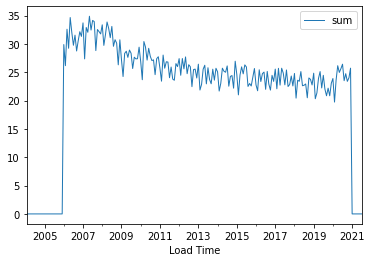

In [12]:
merge_data['Load Weight pp'] = merge_data['Load Weight'] / merge_data['Total area population']
merge_data['Load Weight pp'].resample("m").agg(["sum"]).plot(linewidth = 1)

<AxesSubplot:xlabel='Load Time'>

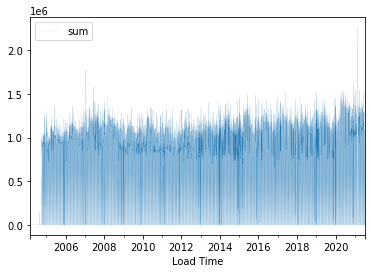

In [13]:
#Sum for each day
garbage_collections['Load Weight'].resample("D").agg(["sum"]).plot(linewidth = 0.1)

In [14]:
#summarize per month
garbage_collections_t = garbage_collections['Load Weight'].resample("m").agg(["sum"])

<AxesSubplot:xlabel='Load Time'>

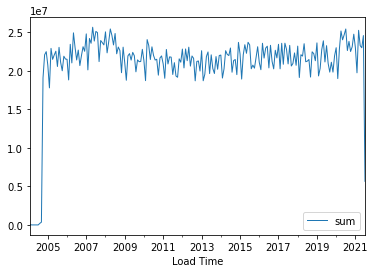

In [15]:
garbage_collections_t.plot(linewidth = 1)

In [16]:
import statsmodels.api as sm
import statsmodels.tsa.seasonal as smts

In [17]:
stl_decomp = smts.STL(garbage_collections_t).fit()

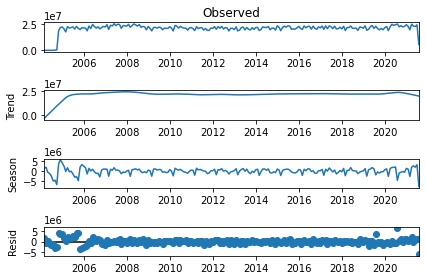

In [18]:
stl_decomp.plot()
plt.show()

# END OF Focus on Garbage collection

# Using all Load Types and merging it with population

In [19]:
#Slice time horizon
waste = waste.loc['2006-01-01': '2020-12-31']
waste
population

,Year,Total area population,Annualized growth rate
0,2006,718912,2.6
1,2007,735088,2.3
2,2008,750525,2.1
3,2009,774037,3.1
4,2010,790390,2.1
5,2011,812025,2.7
6,2012,832326,2.5
7,2013,855215,2.8
8,2014,878733,2.7
9,2015,900701,2.5


In [20]:
#Merge
m_waste = waste.merge(population, on='Year', how='left', indicator=True)
m_waste

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Month,Year,Date,Total area population,Annualized growth rate,_merge
0,01/02/2006,YARD TRIMMING,2006-01-02 01:22:00,16500.0,HORNSBY BEND,YARD TRIMMINGS,YM07,158808,1,2006,2006-01-02,718912,2.6,both
1,01/02/2006,YARD TRIMMING,2006-01-02 01:23:00,16500.0,HORNSBY BEND,YARD TRIMMINGS,YM08,158810,1,2006,2006-01-02,718912,2.6,both
2,01/02/2006,GARBAGE COLLECTIONS,2006-01-02 01:27:00,19460.0,TDS LANDFILL,GARBAGE COLLECTION,PAM62,158999,1,2006,2006-01-02,718912,2.6,both
3,01/02/2006,YARD TRIMMING,2006-01-02 01:30:00,11000.0,HORNSBY BEND,YARD TRIMMINGS,YM04,161099,1,2006,2006-01-02,718912,2.6,both
4,01/02/2006,GARBAGE COLLECTIONS,2006-01-02 01:36:00,24460.0,TDS LANDFILL,GARBAGE COLLECTION,PM83,160208,1,2006,2006-01-02,718912,2.6,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592650,12/31/2020,GARBAGE COLLECTIONS,2020-12-31 12:45:00,6060.0,TDS LANDFILL,GARBAGE COLLECTION,PH39,903618,12,2020,2020-12-31,961855,1.2,both
592651,12/31/2020,GARBAGE COLLECTIONS,2020-12-31 12:46:00,10780.0,TDS LANDFILL,GARBAGE COLLECTION,PH14,902493,12,2020,2020-12-31,961855,1.2,both
592652,12/31/2020,GARBAGE COLLECTIONS,2020-12-31 12:48:00,14080.0,TDS LANDFILL,GARBAGE COLLECTION,PH24,901965,12,2020,2020-12-31,961855,1.2,both
592653,12/31/2020,GARBAGE COLLECTIONS,2020-12-31 12:57:00,16840.0,TDS LANDFILL,GARBAGE COLLECTION,PH40,901952,12,2020,2020-12-31,961855,1.2,both


In [21]:
#Transform
m_waste['Load Time'] = pd.to_datetime(m_waste['Load Time'], format='%m/%d/%Y %H:%M:%S %p')
m_waste = m_waste.set_index(m_waste['Load Time'])
m_waste

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Month,Year,Date,Total area population,Annualized growth rate,_merge
Load Time,,,,,,,,,,,,,,
2006-01-02 01:22:00,01/02/2006,YARD TRIMMING,2006-01-02 01:22:00,16500.0,HORNSBY BEND,YARD TRIMMINGS,YM07,158808,1,2006,2006-01-02,718912,2.6,both
2006-01-02 01:23:00,01/02/2006,YARD TRIMMING,2006-01-02 01:23:00,16500.0,HORNSBY BEND,YARD TRIMMINGS,YM08,158810,1,2006,2006-01-02,718912,2.6,both
2006-01-02 01:27:00,01/02/2006,GARBAGE COLLECTIONS,2006-01-02 01:27:00,19460.0,TDS LANDFILL,GARBAGE COLLECTION,PAM62,158999,1,2006,2006-01-02,718912,2.6,both
2006-01-02 01:30:00,01/02/2006,YARD TRIMMING,2006-01-02 01:30:00,11000.0,HORNSBY BEND,YARD TRIMMINGS,YM04,161099,1,2006,2006-01-02,718912,2.6,both
2006-01-02 01:36:00,01/02/2006,GARBAGE COLLECTIONS,2006-01-02 01:36:00,24460.0,TDS LANDFILL,GARBAGE COLLECTION,PM83,160208,1,2006,2006-01-02,718912,2.6,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 12:45:00,12/31/2020,GARBAGE COLLECTIONS,2020-12-31 12:45:00,6060.0,TDS LANDFILL,GARBAGE COLLECTION,PH39,903618,12,2020,2020-12-31,961855,1.2,both
2020-12-31 12:46:00,12/31/2020,GARBAGE COLLECTIONS,2020-12-31 12:46:00,10780.0,TDS LANDFILL,GARBAGE COLLECTION,PH14,902493,12,2020,2020-12-31,961855,1.2,both
2020-12-31 12:48:00,12/31/2020,GARBAGE COLLECTIONS,2020-12-31 12:48:00,14080.0,TDS LANDFILL,GARBAGE COLLECTION,PH24,901965,12,2020,2020-12-31,961855,1.2,both


In [27]:
#create total waste production per person
m_waste['Load Weight pp'] = (m_waste['Load Weight'] / m_waste['Total area population'])*100
m_waste['Load Weight pp'].resample('m').agg(['sum'])

,sum
Load Time,
2006-01-31,4893.538152
2006-02-28,3867.223109
2006-03-31,5505.217746
2006-04-30,4809.336748
2006-05-31,6069.242828
...,...
2020-08-31,4028.532783
2020-09-30,4345.496982
2020-10-31,4333.914363


                     sum
Load Time               
2006-01-31 4893.53815210
2006-02-28 3867.22310937
2006-03-31 5505.21774570
2006-04-30 4809.33674775
2006-05-31 6069.24282805
...                  ...
2020-08-31 4028.53278301
2020-09-30 4345.49698239
2020-10-31 4333.91436339
2020-11-30 4841.53058413
2020-12-31 5131.07256291

[180 rows x 1 columns]


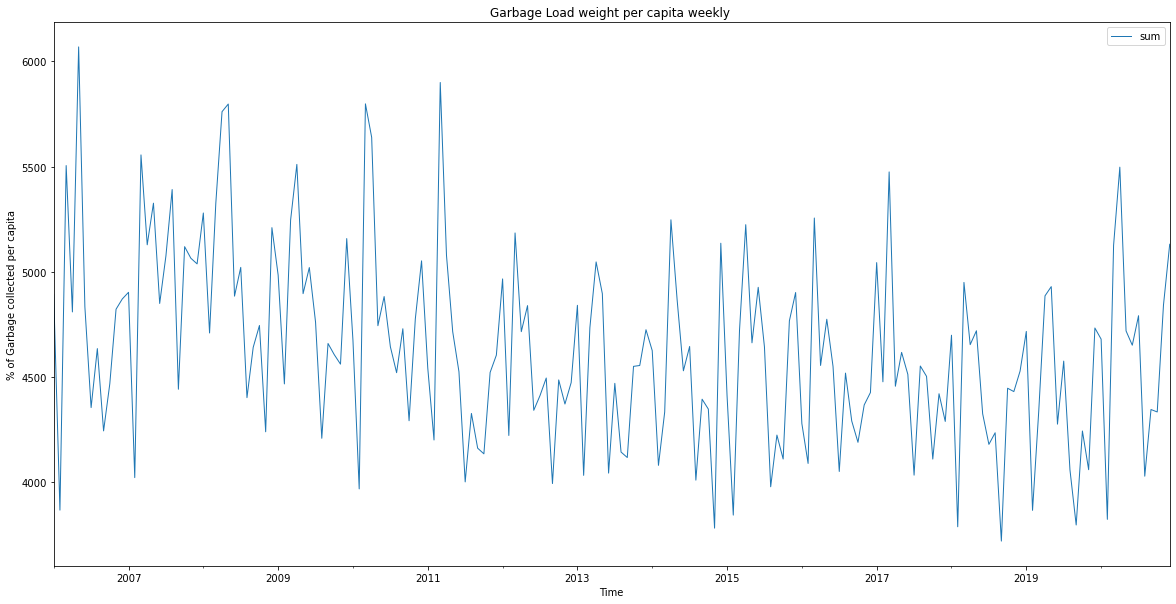

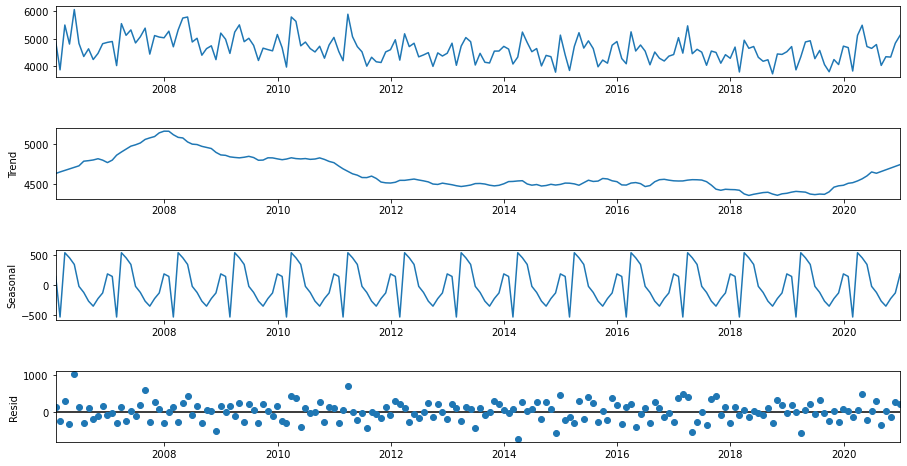

In [170]:
## data and DECOMPOSITION
import statsmodels.api as sm
y=m_waste['Load Weight pp'].resample('m').agg(['sum'])
y.plot(linewidth = 1,figsize=(20,10))
plt.title("Garbage Load weight per capita weekly ")
plt.xlabel("Time")
plt.ylabel("% of Garbage collected per capita")
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
seasonal_decompose(y)


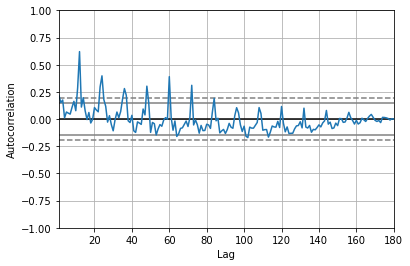

In [96]:
## AUTOCORRELATION FUNCTION TO CHECK VISUAL STATIONARITY 
autocorrelation_plot(y)
pyplot.show()

In [66]:
### CHECKING STATIONARITY WITH ADF TEST
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
        
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.379
P-value = 0.592
Critical values :
	1%: -3.470616369591229 - The data is not stationary with 99% confidence
	5%: -2.8792214018977655 - The data is not stationary with 95% confidence
	10%: -2.57619681359045 - The data is not stationary with 90% confidence


 > Is the 12 lag differenced data stationary ?
Test statistic = -4.156
P-value = 0.001
Critical values :
	1%: -3.473542528196209 - The data is  stationary with 99% confidence
	5%: -2.880497674144038 - The data is  stationary with 95% confidence
	10%: -2.576878053634677 - The data is  stationary with 90% confidence
 > Is the de-trended data stationary ?
Test statistic = -2.950
P-value = 0.040
Critical values :
	1%: -3.472703119504854 - The data is not stationary with 99% confidence
	5%: -2.880131672353732 - The data is  stationary with 95% confidence
	10%: -2.5766826861130268 - The data is  stationary with 90% confidence


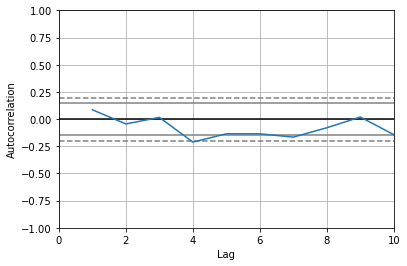

,sum
Load Time,
2006-12-31,0.15634621
2007-01-31,0.20997458
2007-02-28,-1.39531357
2007-03-31,1.35141952
2007-04-30,0.53326134
...,...
2020-08-31,-0.91718981
2020-09-30,-0.44159727
2020-10-31,-0.48603039


In [237]:
# MAKE DATA STATIONARY with detrending and diffeerenciating
y_12lag =  (y - y.shift(12))
ADF_test(y_12lag,'12 lag differenced data') 

y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()
ADF_test(y_detrend,'de-trended data')
y_detrend=y_detrend.dropna()

autocorrelation_plot(y_detrend).set_xlim([0, 10])
pyplot.show()

y_detrend

In [262]:
### FORECAST
from statsforecast import StatsForecast
from statsforecast.models import seasonal_naive, auto_arima
from statsforecast.utils import AirPassengers
y_detrend=np.array(y_detrend).T
y_detrend=np.squeeze(y_detrend)
horizon = 62
ap_train = y_detrend[:-horizon]
ap_test = y_detrend[-horizon:]


series_train = pd.DataFrame(
    {
        'ds': pd.date_range(start='2009-12-31', periods=ap_train.size, freq='M'),
        'y': ap_train
    },
    index=pd.Index([0] * ap_train.size, name='unique_id')
)



In [263]:
fcst = StatsForecast(
    series_train, 
    models=[(auto_arima, 12), (seasonal_naive, 12)], 
    freq='m', 
    n_jobs=1
)
forecasts = fcst.forecast(62, level=(80, 95))

forecasts
forecasts['y_test'] = ap_test
forecasts

C:\Users\aleco\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))
C:\Users\aleco\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))


,ds,auto_arima_season_length-12_mean,auto_arima_season_length-12_lo-80,auto_arima_season_length-12_lo-95,auto_arima_season_length-12_hi-80,auto_arima_season_length-12_hi-95,seasonal_naive_season_length-12,y_test
unique_id,,,,,,,,
0,2018-11-30,-1.51251471,-2.36603498,-2.81786108,-0.65899462,-0.20716834,-1.70936215,0.47836874
0,2018-12-31,1.00206435,0.14885834,-0.30280164,1.85527039,2.30693030,1.44639790,0.86957197
0,2019-01-31,0.00264395,-0.85056245,-1.30222261,0.85585034,1.30751050,-0.15761019,-0.57247091
0,2019-02-28,-1.36678004,-2.21998644,-2.67164660,-0.51357365,-0.06191344,-1.33621383,-1.14690025
0,2019-03-31,0.96840912,0.11520275,-0.33645743,1.82161558,2.27327561,0.48724586,1.49874101
...,...,...,...,...,...,...,...,...
0,2023-08-31,-0.87428534,-2.06054688,-2.68851590,0.31197634,0.93994534,-1.11420226,-0.91718981
0,2023-09-30,-0.75264549,-1.93890715,-2.56687617,0.43361616,1.06158519,-0.55826658,-0.44159727
0,2023-10-31,-0.47002006,-1.65628171,-2.28425074,0.71624160,1.34421062,-0.73681581,-0.48603039


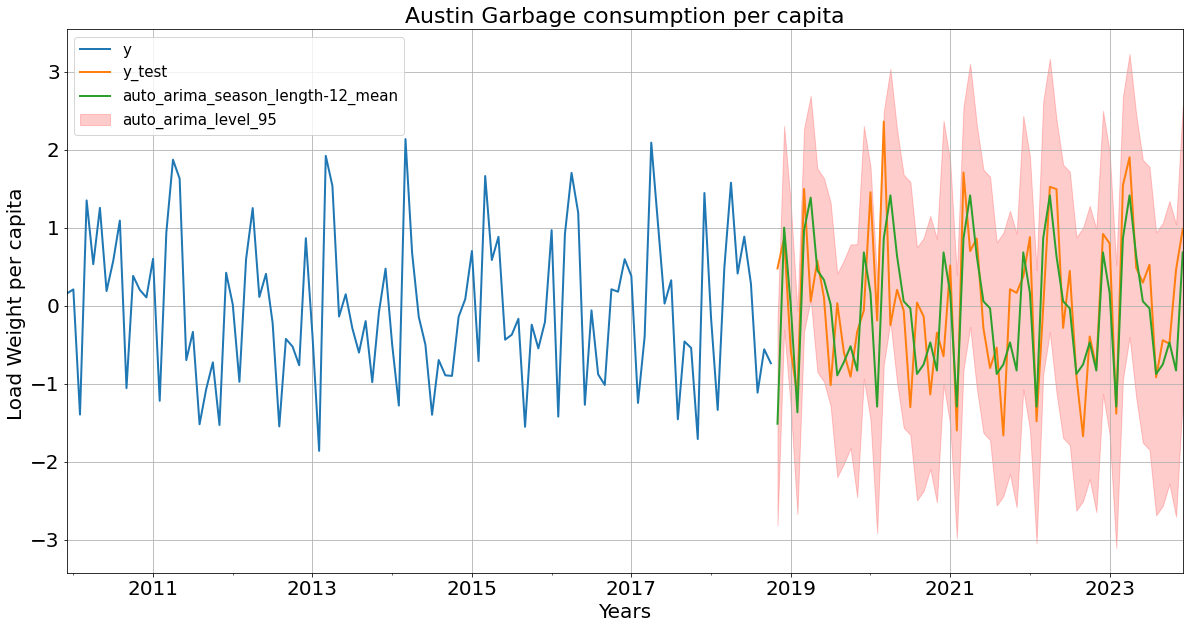

In [264]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
df_plot = pd.concat([series_train, forecasts]).set_index('ds')
df_plot[['y', 'y_test', 'auto_arima_season_length-12_mean']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['auto_arima_season_length-12_lo-95'], 
                df_plot['auto_arima_season_length-12_hi-95'],
                alpha=.2,
                color='red',
                label='auto_arima_level_95')
ax.set_title('Austin Garbage consumption per capita', fontsize=22)
ax.set_ylabel('Load Weight per capita ', fontsize=20)
ax.set_xlabel('Years', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)